# Numerical Optimization (CS215300) Assignment 3
## Introduction
In this assignment, we expect you to be able to solve constrained optimization problem by Scipy library. We want you to apply two algorithms on the following problem as benchmark, survey the method used in these libraries, and analysis the behaviour of these algorithms.
The library document link: https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

## Task
1. Please solve the following problrem by using trust-constr method:
$$\begin{array}{lll}
        \min_{x_1,x_2} & f(x_1,x_2)=-x_1-x_2 \\
        \mbox{s.t. } & -2x_1^4 + 8x_1^3 -8x_1^2 + x_2 - 2 \le 0  \\
         & -4x_1^4 + 32x_1^3 - 88x_1^2 + 96x_1 + x_2 -36 \le 0   \\
         & 0 \le x_1 \le 3 \\
         & 0 \le x_2 \le 4 \\
\end{array}$$
2. Please use COBYLA method to solve the same problem.
3. In your report, please read the paper cited in the libraries, which gives the details of the algorithms. Write a brief introduction of the algorithms, and compare their behaviours in this benchmark. You are not necessarily to read the original paper, other resourses (ex. slides from other schools or surveys) are also acceptable, please include the link or paper name in your reference if you referred other resources.
4. Please provide the Jacobian and Hessian function in matrix form in your report. Basic latex syntax is supported in Markdown.
5. Rename this notebook file with your student ID and upload it to eeclass platform. (ex. 107xxxxxx.ipynb)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from scipy.optimize import Bounds
from scipy.optimize import NonlinearConstraint, LinearConstraint
from scipy.optimize import minimize

### Define objective function

In [ ]:
def f(x):
    # TODO
    return - sum(x)

### Define constraint functions and derivatives
Note: Please not use sparse matrices.

In [ ]:
# TODO: derive and define the functions
def cons_f(x):
    # TODO
    return [-2 * x[0]**4 + 8 * x[0]**3 - 8 * x[0]**2 + x[1] - 2, -4 * x[0]**4 + 32 * x[0]**3 - 88 * x[0]**2 + 96 * x[0] + x[1] - 36]

def lin_cons_f():
    return LinearConstraint([[1, 0], [0, 1]], [0, 0], [3, 4])

def lin_cons_func(x):
    return x[0] <= 3 and x[0] >= 0 and x[1] <= 4 and x[1] >= 0
    
def cons_Jacobian(x):
    # TODO
    return [[-8 * x[0]**3 + 24 * x[0]**2 - 16 * x[0], 1],
            [-16 * x[0]**3 + 96 * x[0]**2 - 176 * x[0] + 96, 1]]

def cons_Hessian(x, v):
    # TODO
    return v[0] * np.array([[-24 * x[0]**2 + 48 * x[0] - 16, 0], [0, 0]]) + v[1] * np.array([[-48 * x[0]**2 + 192 * x[0] - 176, 0], [0, 0]])

# TODO: Insert the functions above into a NonlinearConstraint obeject
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 0, jac=cons_Jacobian, hess=cons_Hessian)

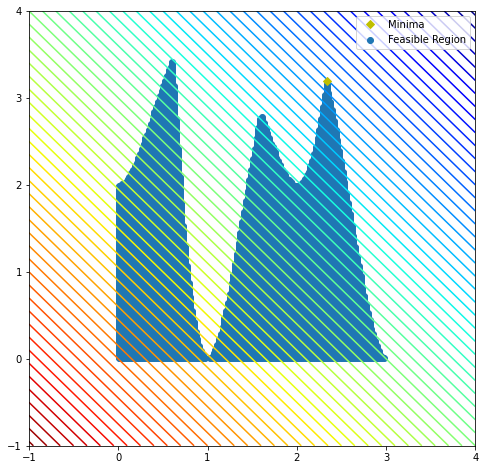

In [ ]:
# def cons_f(x):
#     # TODO
#     return np.array([-2 * x[0]**4 + 8 * x[0]**3 - 8 * x[0]**2 + x[1] - 2, -4 * x[0]**4 + 32 * x[0]**3 - 88 * x[0]**2 + 96 * x[0] + x[1] - 36])

def plot_surface(xiter: list=None, optimizer_name: str=None):
    x = np.linspace(-1, 4, 250)
    y = np.linspace(-1, 4, 250)
    minimum = (2.34, 3.2)

    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])

    if xiter is not None:
        iter_x, iter_y = xiter[:, 0], xiter[:, 1]

    fig = plt.figure(figsize=(8, 8))

    # Contour
    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    if xiter is not None:
        ax.plot(iter_x, iter_y, color='r', marker='x', label='Initial Point')

    title_str = ''
    if optimizer_name is not None:
        title_str = title_str + f'{optimizer_name}'

    if xiter is not None:
        title_str = title_str + f' with {len(iter_x)} iterations'
    
    ax.set_title(title_str)

    # Trajectory
    plt.plot(*minimum, 'yD', label="Minima")
    if xiter is not None:
        plt.plot(iter_x[-1], iter_y[-1], 'rD', label='Destination Point')

    # Constraints
    cons_val = np.array(cons_f([X, Y]))
    conds_0 = cons_val[0] <= 0
    conds_1 = cons_val[1] <= 0
    conds_2 = np.all(np.array([X <= 3, X >= 0]), axis=0)
    conds_3 = np.all(np.array([Y <= 4, Y >= 0]), axis=0)
    conds_all = np.all([conds_0, conds_1, conds_2, conds_3], axis=0)

    # print(f"cons_val: {cons_val.shape}")
    # print(f"conds_0: {conds_0.shape}")
    # print(f"conds_2: {conds_2.shape}")
    # print(f"X: {X.shape}")
    # print(f"Y: {Y.shape}")
    # print(f"{len([X, Y])}")

    valide_reg_X, valide_reg_Y = X[conds_all], Y[conds_all]
    plt.scatter(valide_reg_X, valide_reg_Y, label='Feasible Region')
    plt.legend()

    plt.show()

plot_surface()

### Define the bounds 

In [ ]:
# TODO: define the bounds
bounds = Bounds([0, 3], [0, 4])
xs = np.array([[0, 0], [1, 1], [2, 1], [1, 0]])

### Call the minimize library

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


 barrier_parameter: 0.1
 barrier_tolerance: 0.1
          cg_niter: 913
      cg_stop_cond: 3
            constr: [array([  0.21681967, -36.49201808]), array([-0.02757802,  2.223073  ])]
       constr_nfev: [1000, 0]
       constr_nhev: [987, 0]
       constr_njev: [986, 0]
    constr_penalty: 550.2292384249342
  constr_violation: 0.7769270006163205
    execution_time: 2.835378885269165
               fun: -2.1954949842548683
              grad: array([-1., -1.])
               jac: [array([[  0.45966916,   1.        ],
       [100.92707876,   1.        ]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([0.00390625, 0.        ])
           message: 'The maximum number of function evaluations is exceeded.'
            method: 'tr_interior_point'
              nfev: 3000
              nhev: 0
               nit: 1001
             niter: 1001
              njev: 0
        optimality: 0.00390625
            status: 0
           success: False
         tr_radius: 8.553656605

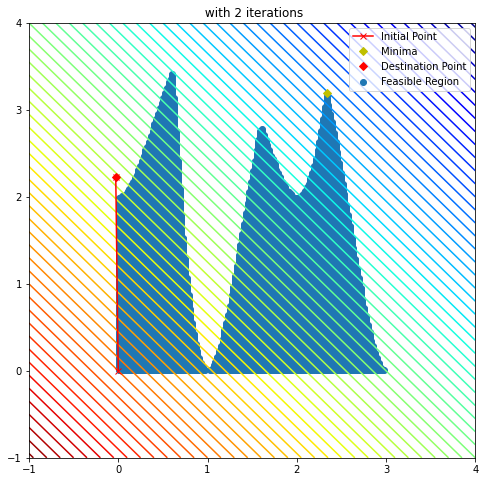

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_trustregion_constr/projections.py:182: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 442
      cg_stop_cond: 2
            constr: [array([ 0.12392828, -7.75860644]), array([0.37810521, 2.87607172])]
       constr_nfev: [598, 0]
       constr_nhev: [122, 0]
       constr_njev: [120, 0]
    constr_penalty: 3548830.997125393
  constr_violation: 0.378105208911808
    execution_time: 0.8038403987884521
               fun: -3.2541769310261217
              grad: array([-1., -1.])
               jac: [array([[-3.05100027,  1.        ],
       [42.31309974,  1.        ]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([ 4.65661287e-10, -2.32830644e-10])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 1794
              nhev: 0
               nit: 459
             niter: 459
              njev: 0
        optimality: 4.656612873077393e-10
            status: 2
           success: True

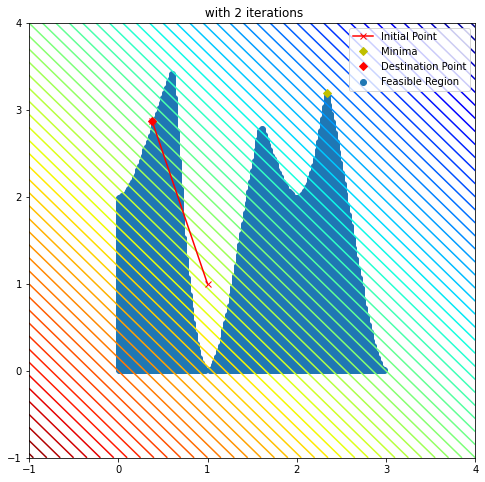

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_trustregion_constr/projections.py:182: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 234
      cg_stop_cond: 2
            constr: [array([-0.27576834,  0.26428214]), array([1.53744193, 2.73571786])]
       constr_nfev: [149, 0]
       constr_nhev: [84, 0]
       constr_njev: [83, 0]
    constr_penalty: 1.0
  constr_violation: 1.5374419295591804
    execution_time: 0.5038242340087891
               fun: -4.273159791706116
              grad: array([-0.99999999, -1.00000001])
               jac: [array([[ 3.05764116,  1.        ],
       [-5.81742656,  1.        ]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([ 1.39698386e-09, -1.16415322e-10])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 447
              nhev: 0
               nit: 246
             niter: 246
              njev: 0
        optimality: 1.3969838619232178e-09
            status: 2
           success: True

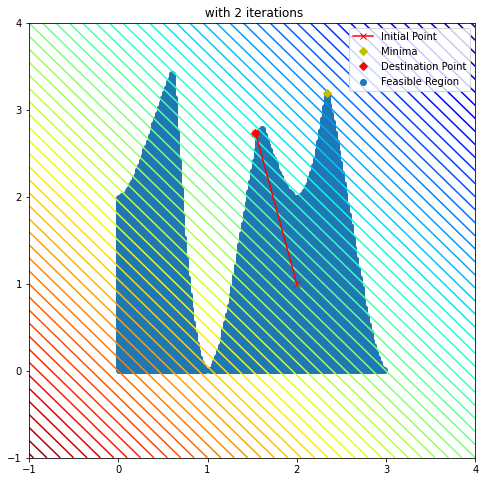

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_trustregion_constr/projections.py:182: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +


 barrier_parameter: 2.048000000000001e-09
 barrier_tolerance: 2.048000000000001e-09
          cg_niter: 448
      cg_stop_cond: 2
            constr: [array([ 0.12392828, -7.75860644]), array([0.37810521, 2.87607172])]
       constr_nfev: [634, 0]
       constr_nhev: [147, 0]
       constr_njev: [146, 0]
    constr_penalty: 4141805.7767378404
  constr_violation: 0.37810520893734434
    execution_time: 0.8676164150238037
               fun: -3.2541769310516626
              grad: array([-1., -1.])
               jac: [array([[-3.05100027,  1.        ],
       [42.31309973,  1.        ]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([4.99600361e-16, 6.66133815e-16])
           message: '`xtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 1902
              nhev: 0
               nit: 460
             niter: 460
              njev: 0
        optimality: 6.661338147750939e-16
            status: 2
           success: Tru

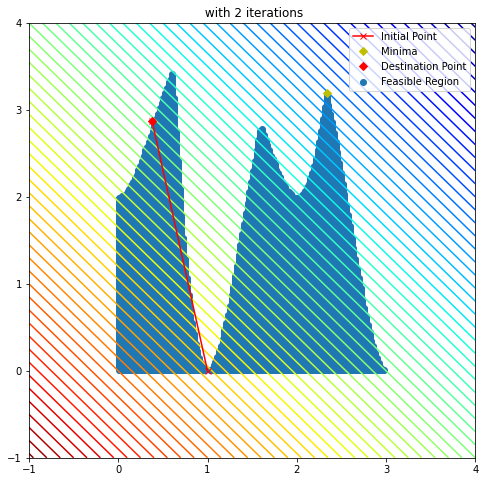

In [ ]:
def trust_reg_solve(xs):
    for x in xs:
        res = minimize(f, x, method='trust-constr', options={'maxiter': 1000},
                       constraints=[nonlinear_constraint],bounds=bounds)
        print(res)
        print(f"Start: {x} | Opt Sol: {res.x} | Constr: {cons_f(res.x)}")
        print(f"Opt Objective Func: {f(res.x)}")
        print(f"Num of Iterations: {res.nit}")
        plot_surface(xiter=np.array([x, res.x]))

trust_reg_solve(xs=xs)

### Apply COBYLA method

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_constraints.py:331: OptimizeWarning: Constraint options `finite_diff_jac_sparsity`, `finite_diff_rel_step`, `keep_feasible`, and `hess`are ignored by this method.
  "are ignored by this method.", OptimizeWarning)


     fun: -4.053708258184975
   maxcv: 3.7853620753480755e-06
 message: 'Optimization terminated successfully.'
    nfev: 19
  status: 1
 success: True
       x: array([0.61160344, 3.44210482])
Start: [0 0] | Opt Sol: [0.61160344 3.44210482] | Constr: [-2.163808259236788e-07, 3.7853620753480755e-06]
Opt Objective Func: -4.053708258184975


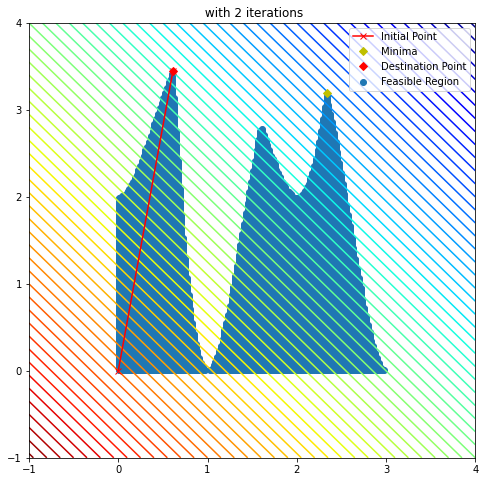

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_constraints.py:331: OptimizeWarning: Constraint options `finite_diff_jac_sparsity`, `finite_diff_rel_step`, `keep_feasible`, and `hess`are ignored by this method.
  "are ignored by this method.", OptimizeWarning)


     fun: -5.508012518922257
   maxcv: 3.6417964892621058e-06
 message: 'Optimization terminated successfully.'
    nfev: 25
  status: 1
 success: True
       x: array([2.32952139, 3.17849113])
Start: [1 1] | Opt Sol: [2.32952139 3.17849113] | Constr: [-1.163787427449492e-05, 3.6417964892621058e-06]
Opt Objective Func: -5.508012518922257


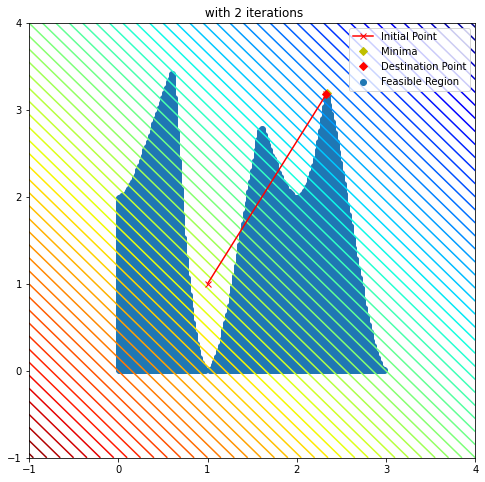

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_constraints.py:331: OptimizeWarning: Constraint options `finite_diff_jac_sparsity`, `finite_diff_rel_step`, `keep_feasible`, and `hess`are ignored by this method.
  "are ignored by this method.", OptimizeWarning)


     fun: -5.508013266702431
   maxcv: 2.3785318603586347e-08
 message: 'Optimization terminated successfully.'
    nfev: 19
  status: 1
 success: True
       x: array([2.32952021, 3.17849306])
Start: [2 1] | Opt Sol: [2.32952021 3.17849306] | Constr: [-7.59291332030898e-08, 2.3785318603586347e-08]
Opt Objective Func: -5.508013266702431


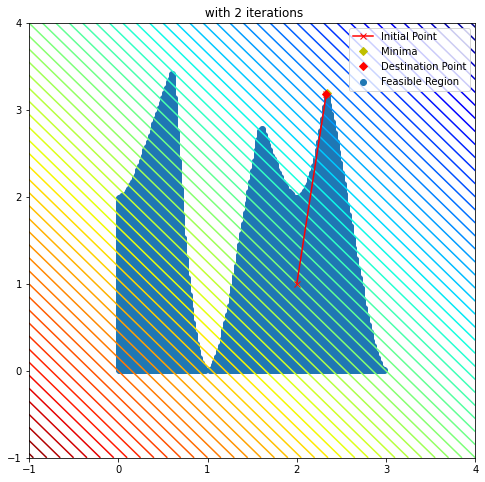

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_constraints.py:331: OptimizeWarning: Constraint options `finite_diff_jac_sparsity`, `finite_diff_rel_step`, `keep_feasible`, and `hess`are ignored by this method.
  "are ignored by this method.", OptimizeWarning)


     fun: -5.508012518922257
   maxcv: 3.6417964892621058e-06
 message: 'Optimization terminated successfully.'
    nfev: 26
  status: 1
 success: True
       x: array([2.32952139, 3.17849113])
Start: [1 0] | Opt Sol: [2.32952139 3.17849113] | Constr: [-1.163787427449492e-05, 3.6417964892621058e-06]
Opt Objective Func: -5.508012518922257


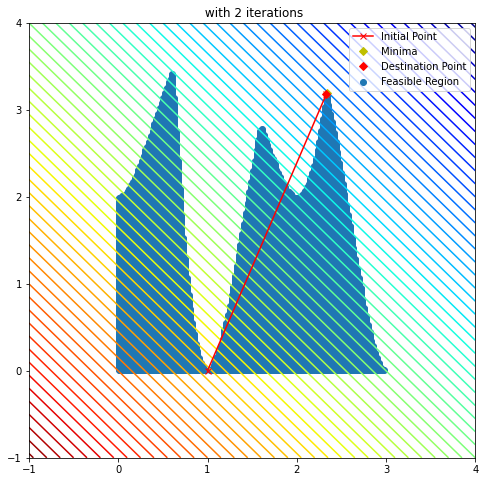

In [ ]:
# TODO

def cobyla_solve(xs):
    for x in xs:
        res = minimize(f, x, method='COBYLA', options={'maxiter': 10000},
                    constraints=[nonlinear_constraint, lin_cons_f()])
        print(res)
        print(f"Start: {x} | Opt Sol: {res.x} | Constr: {cons_f(res.x)}")
        print(f"Opt Objective Func: {f(res.x)}")
        # print(f"Num of Iterations: {res.nit}")
        plot_surface(xiter=np.array([x, res.x]))

cobyla_solve(xs=xs)

## Report

# Constrainted Optimization BY Linear Approximation(COBYLA)

## Algorithm

COBYLA algorithm is an derivative-free and trust-region-based constraint linear programming algorithm. COBYLA is inspired from Nelder–Mead method and prevents the damages yielded by the high  frequency fluctuations in the objective and constraint functions that are of small amplitude.

Suppose the function $F(x)$ is minimized over $n$ varibles. In $i$-th iteration, COBYLA would have a simplex $\{ x_1, x_2, ... x_{n+1} \}$, a approximated solution $x_i^*$ and a radius of the trust region $\rho_i$. In $i$-th iteration, COBYLA only update the variables inside the trust region $\rho_i$ to limit the error of the linear approximation. The radius of the initial and the final trust region are $\rho_{beg}$ and $\rho_{end}$. The radius of the trust region would shrink along the iterations.

In each iteration, COBYLA will choose 1 from 3 options

1. Reducing $\rho$
2. Preserving $\rho$ for another iteration that will calculate $x^*$
3. Preserving p for another iteration that will give priority to improving the "acceptability" of the simplex

COBYLA will stop untill the improvement of the current iteration is small than a threshold(typically, 10%) or the distance between local minima $x^*$ and the optimal vertex of the current iteration $x_0$ is smaller than a half of trust region $\frac{1}{2} \rho$.

## Comparison

- COBYLA usually finds better solution and has less violation to the constraints than trust-region method
- Trust-region method sometimes violate the constraints and stuck in the local minima.
- Both methods are constrainted inside the left/right part of the feasible region which means it cannot pass the bottleneck at (1, 0).

# The Jacobian & Hessian Matrix

## Jacobian Matrix: 

$$
J(\vec{x}) = 
\begin{pmatrix}
    -8x_1^3+24x_1^2-16x_1 & 1 \\
    -16x_1^3+96x_1^2-176x_1+96 & 1 \\
\end{pmatrix}
$$

## Hessian Matrix:

$$
H(\vec{x}) = 
v_0 ×
\begin{pmatrix}
    -24 x_1^2 + 48 x_1 - 16 & 0 \\
    0 & 0 \\
\end{pmatrix}
+ 
v_1 × 
\begin{pmatrix}
    -48 x_1^2 + 192 x_1 - 176 & 0 \\
    0 & 0 \\
\end{pmatrix}
$$

# Reference

- [Nelder-Mead Optimization](https://codesachin.wordpress.com/2016/01/16/nelder-mead-optimization/)